In [ ]:
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input, Dropout, BatchNormalization, Add, Concatenate
from keras.utils import to_categorical, plot_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn import datasets
from sklearn.model_selection import train_test_split

# MNIST DATASET WITH REGULARIZATION

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape

(60000, 28, 28)

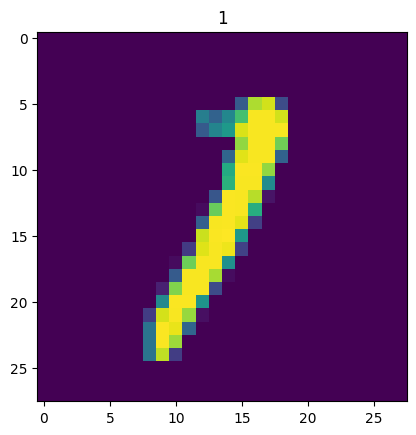

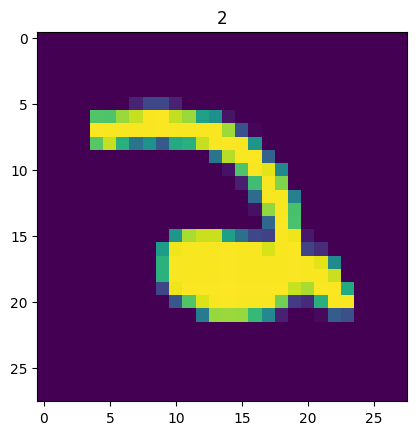

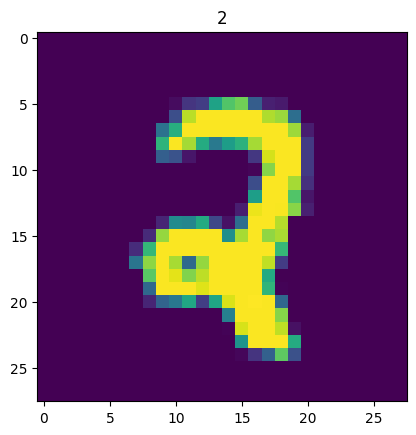

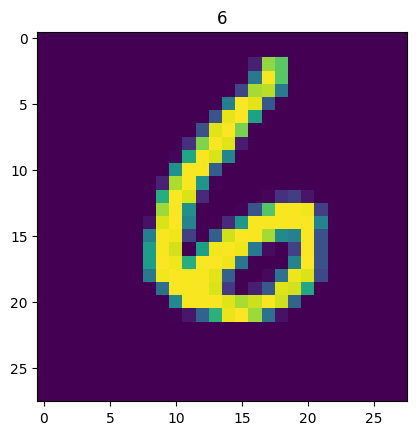

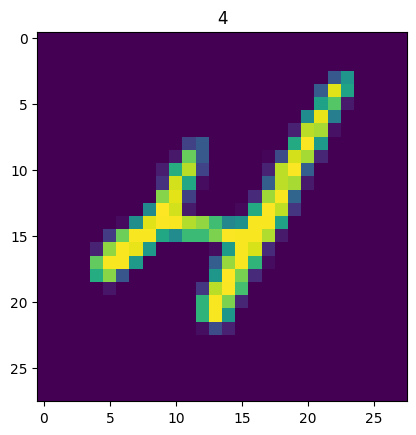

In [ ]:
# Plotting images
for index in np.random.randint(0,60000,5):
  plt.imshow(train_images[index,:,:])
  plt.title(train_labels[index])
  plt.show()

In [ ]:
# Converting labels to categorical data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# reshaping the data for model input
input_size = train_images.shape[1] * train_images.shape[2]
train_images = np.reshape(train_images, [-1, input_size])
train_images = train_images.astype('float32') / 255

test_images = np.reshape(test_images, [-1, input_size])
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape, train_images.shape

((60000, 784), (60000, 784))

In [ ]:
# BUILDING MODEL

inputs = Input(shape = input_size)
x = Dense(32,activation = 'relu')(inputs)
x = Dense(32,activation = 'relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1 = model.fit(train_images, train_labels,
          validation_data = (test_images, test_labels),
          epochs = 10,
          batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4629 - accuracy: 0.8624 - val_loss: 0.2020 - val_accuracy: 0.9390
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2269 - accuracy: 0.9341 - val_loss: 0.1572 - val_accuracy: 0.9513
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1815 - accuracy: 0.9476 - val_loss: 0.1371 - val_accuracy: 0.9579
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1554 - accuracy: 0.9552 - val_loss: 0.1339 - val_accuracy: 0.9597
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1360 - accuracy: 0.9597 - val_loss: 0.1249 - val_accuracy: 0.9624
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1266 - accuracy: 0.9622 - val_loss: 0.1228 - val_accuracy: 0.9620
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1140 - accuracy: 0.9650 - val_loss: 0.1161 - val_accuracy:

# MNIST DATASET WITH REGULARIZATION AND SKIP CONNECTION

In [ ]:
# creating model

inputs = Input(shape = input_size)
x = Dense(64,activation = 'relu')(inputs)
z = Dense(64,activation = 'relu')(x)
x = BatchNormalization()(z)

x = Dense(32, activation = 'relu')(x)
x = Dense(64,activation = 'relu')(x)

x = Add()([x, z])

x = Dense(32,activation = 'relu')(x)
z = Dense(16,activation = 'relu')(x)
x = BatchNormalization()(z)

x = Dense(16,activation = 'relu')(x)
x = Dense(16,activation = 'relu')(x)

x = Add()([x, z])

outputs = Dense(10,activation = 'softmax')(x)
model = Model(inputs,outputs)
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_51 (Dense)            (None, 64)                   50240     ['input_8[0][0]']             
                                                                                                  
 dense_52 (Dense)            (None, 64)                   4160      ['dense_51[0][0]']            
                                                                                                  
 batch_normalization_2 (Bat  (None, 64)                   256       ['dense_52[0][0]']            
 chNormalization)                                                                           

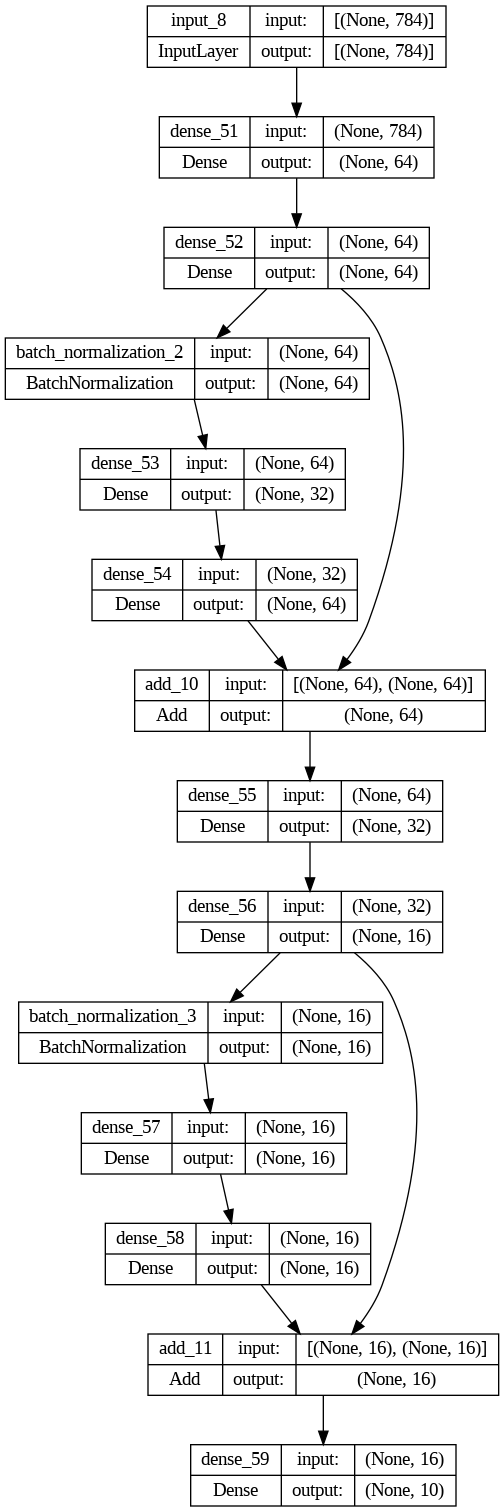

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
history1 = model.fit(train_images, train_labels,
          validation_data = (test_images, test_labels),
          epochs = 10,
          batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3533 - accuracy: 0.8934 - val_loss: 0.2036 - val_accuracy: 0.9379
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1476 - accuracy: 0.9550 - val_loss: 0.1633 - val_accuracy: 0.9510
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1093 - accuracy: 0.9661 - val_loss: 0.1099 - val_accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0894 - accuracy: 0.9717 - val_loss: 0.0991 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0754 - accuracy: 0.9760 - val_loss: 0.1036 - val_accuracy: 0.9686
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0640 - accuracy: 0.9801 - val_loss: 0.0948 - val_accuracy: 0.9719
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0865 - val_accuracy:

# Regression Dataset

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
diabetes.data.shape, diabetes.target.shape

((442, 10), (442,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
input_layer = Input(shape=(10,))

hidden_1 =Dense(30, activation='relu')(input_layer)
hidden_2 = Dense(30, activation='relu')(hidden_1)

concat = Concatenate()([input_layer, hidden_2])
output_layer =Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output_layer])

In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense_60 (Dense)            (None, 30)                   330       ['input_9[0][0]']             
                                                                                                  
 dense_61 (Dense)            (None, 30)                   930       ['dense_60[0][0]']            
                                                                                                  
 concatenate (Concatenate)   (None, 40)                   0         ['input_9[0][0]',             
                                                                     'dense_61[0][0]']      

In [ ]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['mae'])

# fit the model with data
history = model.fit(X_train, y_train,
                   epochs=10,
                   validation_data=(X_test, y_test))

Epoch 1/10
12/12 [==============================] - 3s 17ms/step - loss: 29106.8477 - mae: 151.5871 - val_loss: 28893.4277 - val_mae: 154.1678
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 29085.4980 - mae: 151.5178 - val_loss: 28869.3848 - val_mae: 154.0910
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 29058.4102 - mae: 151.4304 - val_loss: 28837.0371 - val_mae: 153.9868
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 29020.4102 - mae: 151.3074 - val_loss: 28789.5781 - val_mae: 153.8345
Epoch 5/10
12/12 [==============================] - 0s 7ms/step - loss: 28964.8633 - mae: 151.1269 - val_loss: 28719.6719 - val_mae: 153.6103
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 28883.0938 - mae: 150.8635 - val_loss: 28618.5020 - val_mae: 153.2863
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 28768.9551 - mae: 150.4865 - val_loss: 28476.9043 - val_mae: 152.8336
Epoch